In [25]:
!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('sentiment_tweets3.csv', encoding =DATASET_ENCODING)
dataset.head(20)

,Unnamed: 0,message,label
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
5,624,so sleepy. good times tonight though,0
6,701,"@SilkCharm re: #nbn as someone already said, d...",0
7,808,23 or 24Ã¯Â¿Â½C possible today. Nice,0
8,1193,nite twitterville workout in the am -ciao,0
9,1324,"@daNanner Night, darlin'! Sweet dreams to you",0


In [26]:
dataset['message'].value_counts()

Mom's depression tied to kids' emotional, intellectual development  https://ift.tt/2HtVZCEÃÂ                                                   11
2018-04-25                                                                                                                                       4
More than 1 in 20 US children and teens have anxiety or depression  https://www.sciencedaily.com/releases/2018/04/180424184119.htmÃÂ Ã¢ÂÂ¦     4
Good morning                                                                                                                                     3
suffering from chronic depression https://vine.co/v/iu3l2lPBhiKÃÂ                                                                               3
                                                                                                                                                ..
@sammythewizzy Oki! Great. All the best!                                                                              

In [27]:
dataset['label'].value_counts()

0    8000
1    2314
Name: label, dtype: int64

In [28]:
dataset['message'].count()

10314

In [29]:
dataset['label'].count()

10314

In [30]:
len(dataset)

10314

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
Unnamed: 0    10314 non-null int64
message       10314 non-null object
label         10314 non-null int64
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


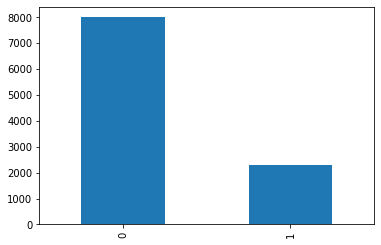

In [32]:
dataset['label'].value_counts().head(10).plot.bar()

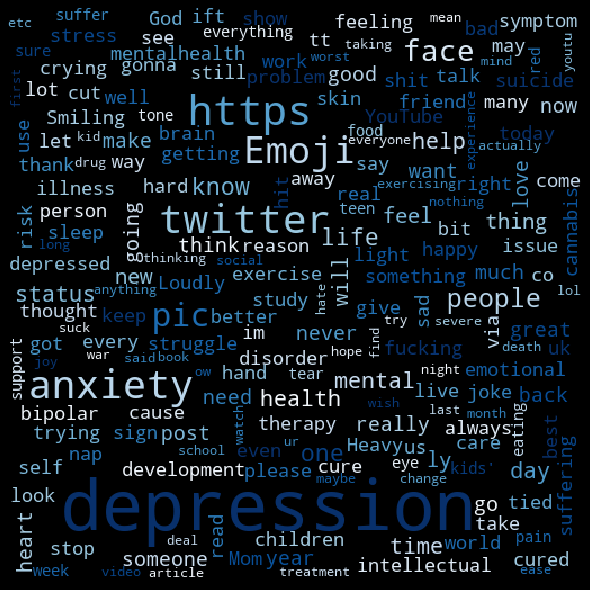

In [33]:

depressive_words = ' '.join(list(dataset[dataset['label'] == 1]['message']))
depressive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(depressive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(depressive_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

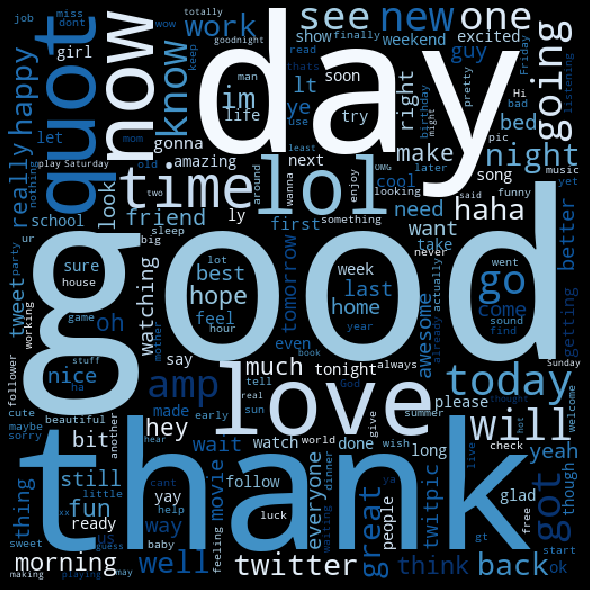

In [35]:
positive_words = ' '.join(list(dataset[dataset['label'] == 0]['message']))
positive_wc = WordCloud(width = 512,height = 512, collocations=False, colormap="Blues").generate(positive_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(positive_wc)
plt.axis('off'), 
plt.tight_layout(pad = 0)
plt.show()

Text(0.5, 1.0, 'Dataset labels distribuition')

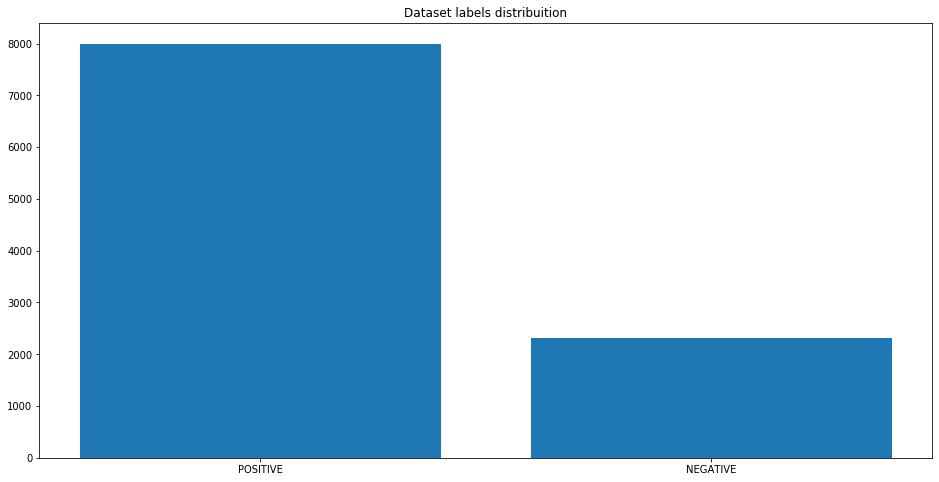

In [21]:
decode_map = {0: "POSITIVE", 1: "NEGATIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]
dataset.label = dataset.label.apply(lambda x: decode_sentiment(x))
from collections import Counter
target_cnt = Counter(dataset.label)
plt.figure(figsize=(16,8))
plt.bar(target_cnt.keys(), target_cnt.values())
plt.title("Dataset labels distribuition")